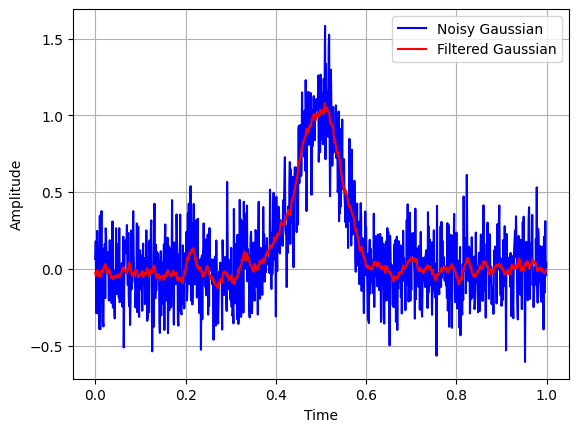

In [10]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Generate Gaussian noise
t = np.linspace(0, 1, 1000, endpoint=False)
noise = np.random.normal(0, 0.2, 1000)

# Add the noise to a Gaussian signal
x = signal.gaussian(1000, std=50) + noise

# Design the Gaussian filter
cutoff_freq = 0.1  # Cutoff frequency as a fraction of the Nyquist frequency
filter_size = 21  # Filter size (odd number)
b = signal.gaussian(filter_size, std=(filter_size - 1) / (2 * np.pi * cutoff_freq))

# Apply the filter to the noisy Gaussian signal
filtered_x = signal.convolve(x, b, mode='same') / sum(b)

# Plot the original Gaussian signal and the filtered signal
plt.figure()
plt.plot(t, x, 'b-', label='Noisy Gaussian')
plt.plot(t, filtered_x, 'r-', label='Filtered Gaussian')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel, ConstantModel

def sum_of_gaussians(x, *params):
    # Split the parameters into amplitude, center, and standard deviation for each Gaussian
    params = np.asarray(params)
    n_gaussians = len(params) // 3

    result = np.zeros_like(x)
    for i in range(n_gaussians):
        amp, cen, sigma = params[i*3], params[i*3+1], params[i*3+2]
        result += GaussianModel().eval(x=x, amplitude=amp, center=cen, sigma=sigma)

    return result

# Generate some sample data
x = np.linspace(0, 10, 100)
y_true = sum_of_gaussians(x, 1, 5, 1, 0.5, 7, 0.8) + np.random.normal(0, 0.1, len(x))

# Create a model with the sum of N Gaussians
model = ConstantModel() + GaussianModel() * 3  # Example with 3 Gaussians

# Set initial parameter values for the model
model.set_param_hint('amplitude', value=1)
model.set_param_hint('center', value=5)
model.set_param_hint('sigma', value=1)
params = model.make_params()

# Perform the fit
result = model.fit(y_true, params, x=x)

# Print the fit statistics
print(result.fit_report())

# Plot the data and the fit
plt.scatter(x, y_true, label='Data')
plt.plot(x, result.best_fit, label='Fit')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'lmfit'